# Customer segmentation with E-Commerce Data



## Context
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

## Content
"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

## Acknowledgements
Per the UCI Machine Learning Repository, this data was made available by Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

## Source

Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.


[Dataset](https://www.kaggle.com/carrie1/ecommerce-data/data#)

# Imports

In [109]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tabulate import tabulate
import plotly.express as px
import missingno as ms
import seaborn as sn
import pandas as pd
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

# Load the data

In [2]:
e_comerce_data = pd.read_csv('data/data.csv', encoding='ISO-8859-1')
e_comerce_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

# Dataset description

| Variable Name | Type  | Description |
|---------------|-------|:------------|
|InvoiceNo      |Nominal|Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.|
|StockCode      |Nominal|Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.|
|Description    |Nominal|Product (item) name.|
|Quantity       |Numeric|The quantities of each product (item) per transaction.|
|InvoiceDate    |Numeric|Invice date and time. The day and time when a transaction was generated.|
|UnitPrice      |Numeric|Unit price. Product price per unit in sterling (£).|
|CustomerID     |Nominal|Customer number. A 5-digit integral number uniquely assigned to each customer.|
|Country        |Nominal|Country name. The name of the country where a customer resides.|

# Helper functions

In [3]:
def get_duplicates(dataframe):
    return dataframe[dataframe.duplicated()]

# Date preprocess

## Data dimensions

Let's start by peeking the dataset and checking the data dimensions.

In [4]:
print('Dataset Shape (ROWS x COLS):', e_comerce_data.shape)
e_comerce_data.head(15)

Dataset Shape (ROWS x COLS): (541909, 8)


InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLOTTE DOLL         8   
13    536367     22310              IVORY KNITTED MUG COSY          6   
14    536367     84969   BOX OF 6 ASSORTED COLOUR TEASPOONS         6   

       InvoiceDate  UnitPrice  CustomerID         Country  
0   12/1/2010 8:26       2.55     17850.0  United Kingdom  
1   12/1/2010 8:26       3.39     17850.0  United Kingdom  
2   12/1/2010 8:26       2.75     17850.0  United Kingdom  
3   12/1/2010 8:26       3.39     17850.0  United Kingdom  
4   12/1/2010 8:26       3.39     17850.0  United Kingdom  
5   12/1/2010 8:26       7.65     17850.0  United Kingdom  
6   12/1/2010 8:26       4.25     17850.0  United Kingdom  
7   12/1/2010 8:28       1.85     17850.0  United Kingdom  
8   12/1/2010 8:28       1.85     17850.0  United Kingdom  
9   12/1/2010 8:34       1.69     13047.0  United Kingdom  
10  12/1/2010 8:34       2.10     13047.0  United Kingdom  
11  12/1/2010 8:34       2.10     13047.0  United Kingdom  
12  12/1/2010 8:34       3.75     13047.0  United Kingdom  
13  12/1/2010 8:34       1.65     13047.0  United Kingdom  
14  12/1/2010 8:34       4.25     13047.0  United Kingdom

We have `541909` entries in the dataset with `8` attributes.

## Missing Values

First, we must verify if the data set contains missing values and find an appropriate action for each case (either remove the rows or fill the missing values).

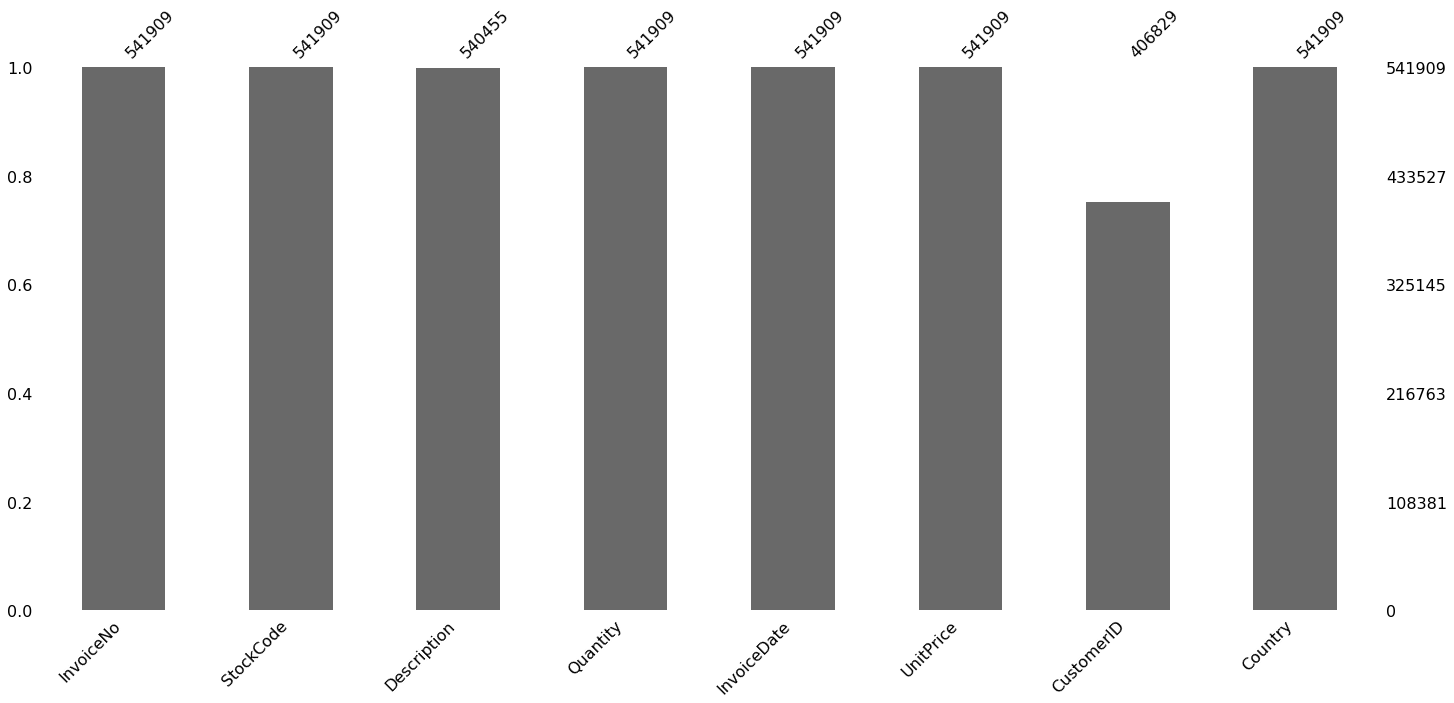

In [5]:
ms.bar(e_comerce_data)
plt.show()

There are missing values in two attributes: `Description` & `Customer ID`, lets start by checking how many missing values we have.

In [6]:
print(f'Null values: \n______________________\n{e_comerce_data.isnull().sum()}')

Null values: 
______________________
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Missing Values:
```
Description      1454      ~0.28%  of the attribute values

CustomerID     135080      ~24.93% of the attribute values
```

Let's see how are this missing values distributed in the dataset rows and columns.

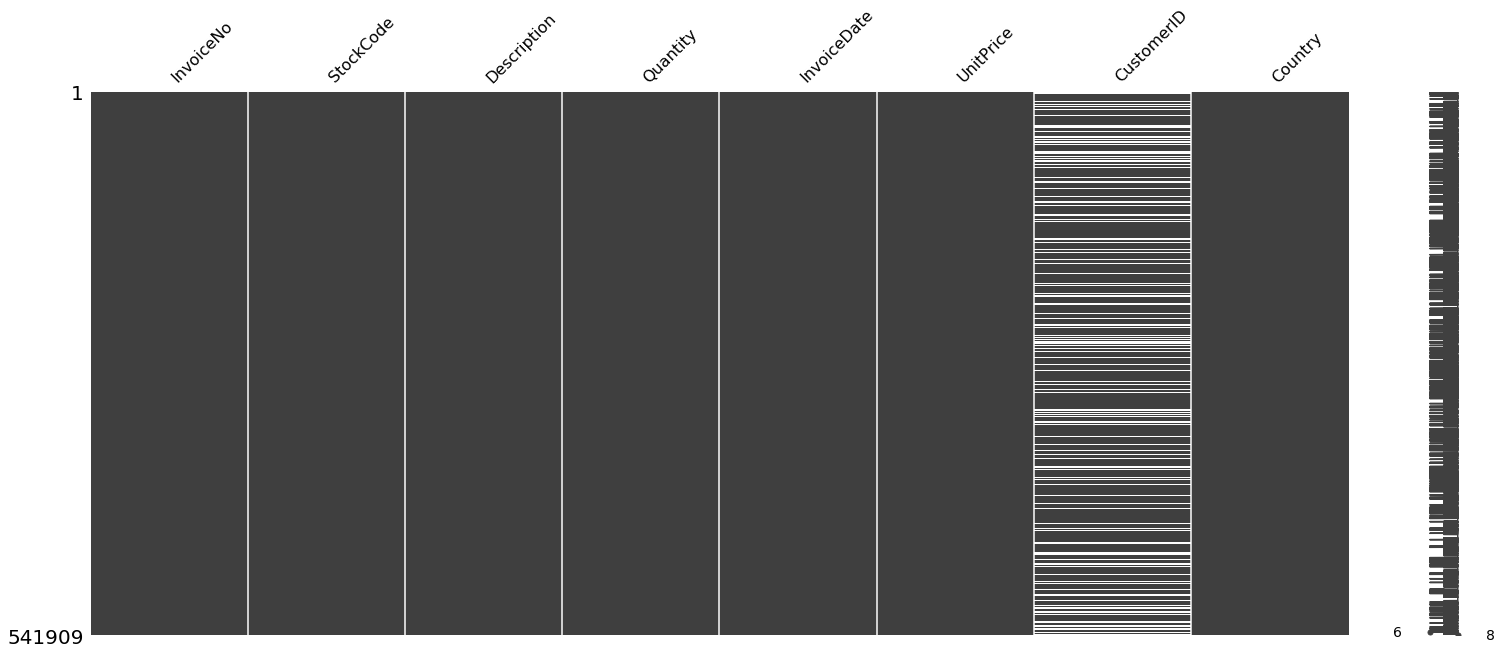

In [7]:
ms.matrix(e_comerce_data)
plt.show()

First let's try to find out if there is some relation in the missing descriptions.

In [8]:
missing_descriptions = e_comerce_data[e_comerce_data.Description.isnull()]
missing_descriptions.head(10)

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970    536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971    536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972    536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987    536549    85226A         NaN         1  12/1/2010 14:34        0.0   
1988    536550     85044         NaN         1  12/1/2010 14:34        0.0   
2024    536552     20950         NaN         1  12/1/2010 14:34        0.0   
2025    536553     37461         NaN         3  12/1/2010 14:35        0.0   
2026    536554     84670         NaN        23  12/1/2010 14:35        0.0   
2406    536589     21777         NaN       -10  12/1/2010 16:50        0.0   

      CustomerID         Country  
622          NaN  United Kingdom  
1970         NaN  United Kingdom  
1971         NaN  United Kingdom  
1972         NaN  United Kingdom  
1987         NaN  United Kingdom  
1988         NaN  United Kingdom  
2024         NaN  United Kingdom  
2025         NaN  United Kingdom  
2026         NaN  United Kingdom  
2406         NaN  United Kingdom

Just by peeking the dataset we can see that the unit prices are 0, lets check this theory.

In [9]:
print(f'Negative prices: {"No" if len(missing_descriptions[missing_descriptions.UnitPrice<0])==0 else "Yes"}')
print(f'Sum of all prices: {missing_descriptions.UnitPrice.sum()}')

Negative prices: No
Sum of all prices: 0.0


Let's check the table but this time we're going to filter by a Stock Code of a product with missing description

In [10]:
e_comerce_data[e_comerce_data.StockCode=='22139'].iloc[:10]

InvoiceNo StockCode                       Description  Quantity  \
106      536381     22139  RETROSPOT TEA SET CERAMIC 11 PC         23   
622      536414     22139                               NaN        56   
6392     536942     22139                            amazon        15   
6885     536982     22139  RETROSPOT TEA SET CERAMIC 11 PC         10   
7203     537011     22139                               NaN        -5   
14908    537624     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
15018    537633     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   
15033    537634     22139  RETROSPOT TEA SET CERAMIC 11 PC          2   
17368    537754     22139  RETROSPOT TEA SET CERAMIC 11 PC          2   
19890    537900     22139  RETROSPOT TEA SET CERAMIC 11 PC          1   

           InvoiceDate  UnitPrice  CustomerID         Country  
106     12/1/2010 9:41       4.25     15311.0  United Kingdom  
622    12/1/2010 11:52       0.00         NaN  United Kingdom  
6392   12/3/2010 12:08       0.00         NaN  United Kingdom  
6885   12/3/2010 14:27      11.02         NaN  United Kingdom  
7203   12/3/2010 15:38       0.00         NaN  United Kingdom  
14908  12/7/2010 14:41       4.95     12748.0  United Kingdom  
15018  12/7/2010 15:14       4.95         NaN  United Kingdom  
15033  12/7/2010 15:15       4.95     16775.0  United Kingdom  
17368  12/8/2010 11:16       4.95     16081.0  United Kingdom  
19890  12/9/2010 10:45       4.95     15983.0  United Kingdom

Well, we found out 4 interesting things:

1. We have negative quantities.
2. We have descriptions for the same product but with different text value `RETROSPOT TEA SET CERAMIC 11 PC` → `amazon`.
3. By knowing this we can fill the missing descriptions with same stock code products descriptions.
4. A customer with id 15311 really ceramic tea sets.

Considering all missing descriptions have a price of 0 this could be some kind of refound, or other kind of transaction, so let's just remove them.

In [11]:
e_comerce_data = e_comerce_data.dropna(subset=['Description'])
assert len(e_comerce_data)==541909-1454, 'NaN Drop Failed'

In [12]:
print(f'Null values: \n______________________\n{e_comerce_data.isnull().sum()}')

Null values: 
______________________
InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64


In [13]:
print(f'New Dataset Shape: {e_comerce_data.shape}')

New Dataset Shape: (540455, 8)


Ok, thats it for missing descriptions for now. Now let's whats happening with the missing customer id's.

In [14]:
missing_customer_ids = e_comerce_data[e_comerce_data.CustomerID.isnull()]
missing_customer_ids.head(10)

InvoiceNo StockCode                          Description  Quantity  \
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   
1452    536544     21809     CHRISTMAS HANGING TREE WITH BELL         1   

          InvoiceDate  UnitPrice  CustomerID         Country  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom  
1447  12/1/2010 14:32       1.66         NaN  United Kingdom  
1448  12/1/2010 14:32       2.51         NaN  United Kingdom  
1449  12/1/2010 14:32       0.43         NaN  United Kingdom  
1450  12/1/2010 14:32       0.43         NaN  United Kingdom  
1451  12/1/2010 14:32       0.43         NaN  United Kingdom  
1452  12/1/2010 14:32       2.51         NaN  United Kingdom

## Negative Quantities

In [15]:
negative_quantity = e_comerce_data[e_comerce_data.Quantity < 0]
negative_quantity.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41      27.50     14527.0  United Kingdom  
154   12/1/2010 9:49       4.65     15311.0  United Kingdom  
235  12/1/2010 10:24       1.65     17548.0  United Kingdom  
236  12/1/2010 10:24       0.29     17548.0  United Kingdom  
237  12/1/2010 10:24       0.29     17548.0  United Kingdom

In [16]:
negative_quantity.shape

(9762, 8)

`~1.8%` of the dataset contains orders with negative quantitys. Let's make a graph with this neagive values.

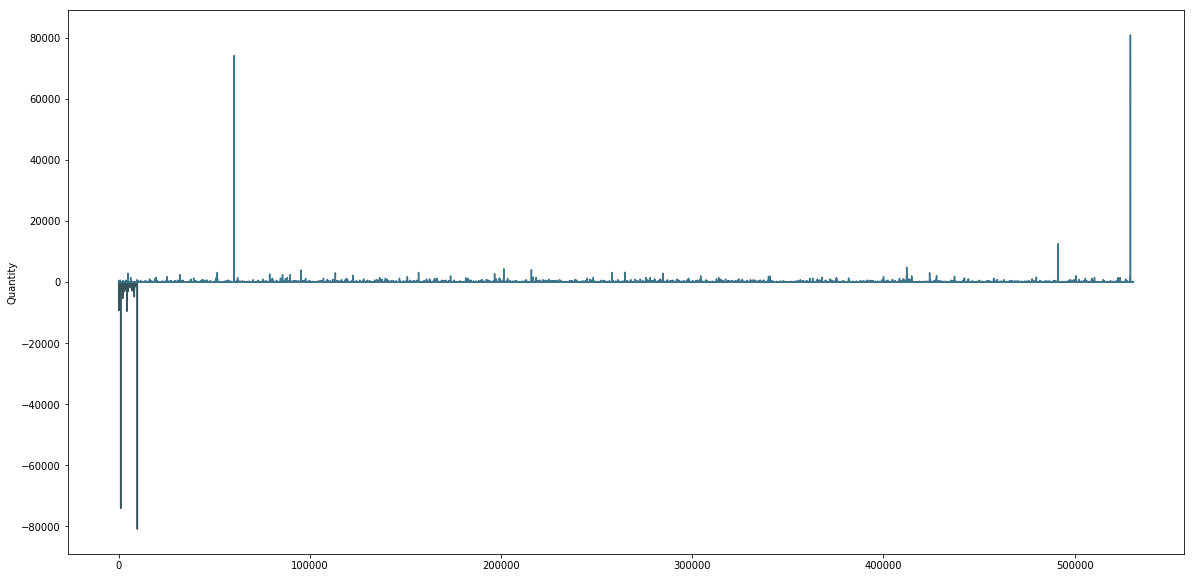

In [28]:
sn.lineplot(np.arange(len(negative_quantity.Quantity)), negative_quantity.Quantity, palette="tab10")
sn.lineplot(np.arange(len(e_comerce_data[e_comerce_data.Quantity > 0])), e_comerce_data[e_comerce_data.Quantity > 0].Quantity, palette="CMRmap_r")
plt.show()

We can see that the Negative quantities are low ammounts in comparison with positive quantities.

In [53]:
print(tabulate([['Unique transactions with negative quantities',f'{len(negative_quantity.InvoiceNo.unique())}'],
['Unique products with negative quantities',f'{len(negative_quantity.StockCode.unique())}'],
['Unique negative quantities',f'{len(negative_quantity.Quantity.unique())}'],
['Unique purchase dates with negative quantities',f'{len(negative_quantity.InvoiceDate.unique())}'],
['Unique prices with negative quantities',f'{len(negative_quantity.UnitPrice.unique())}'],
['Unique customers with negative quantities',f'{len(negative_quantity.CustomerID.unique())}']]))

----------------------------------------------  ----
Unique transactions with negative quantities    4310
Unique products with negative quantities        2111
Unique negative quantities                       288
Unique purchase dates with negative quantities  4178
Unique prices with negative quantities           574
Unique customers with negative quantities       1590
----------------------------------------------  ----


Let's try to find out if this negative quantities are all some kind of refounds by searching if all the InvoceNo are cancelled.

In [68]:
print('Uniqie values:',negative_quantity.InvoiceNo.apply(lambda x: x[0]).unique())
print('Cancelled orders:',sum(negative_quantity.InvoiceNo.apply(lambda x: x[0])=='C'))
print('Negative quantities & not cancelled',sum(negative_quantity.InvoiceNo.apply(lambda x: x[0])=='5'))

Uniqie values: ['C' '5']
Cancelled orders: 9288
Negative quantities & not cancelled 474


We can remove the cancelled orders.

In [74]:
e_comerce_data = e_comerce_data[e_comerce_data.InvoiceNo.apply(lambda x: x[0]) != 'C']

Now we removed all the cancelled orders. We still got `474` negative quantities and we need to figure something out to do with them.

In [76]:
negative_quantity = e_comerce_data[e_comerce_data.Quantity < 0]
negative_quantity.shape

(474, 8)

In [79]:
negative_quantity.head()

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
7313     537032     21275           ?       -30  12/3/2010 16:50        0.0   
13217    537425    84968F       check       -20  12/6/2010 15:35        0.0   
13218    537426    84968E       check       -35  12/6/2010 15:36        0.0   
13264    537432    35833G     damages       -43  12/6/2010 16:10        0.0   
21338    538072     22423      faulty       -13  12/9/2010 14:10        0.0   

       CustomerID         Country  
7313          NaN  United Kingdom  
13217         NaN  United Kingdom  
13218         NaN  United Kingdom  
13264         NaN  United Kingdom  
21338         NaN  United Kingdom

Again we can see that unit prices are 0, lets check this for negative quantities.

In [80]:
print(f'Negative prices: {"No" if len(negative_quantity[negative_quantity.UnitPrice<0])==0 else "Yes"}')
print(f'Sum of all prices: {negative_quantity.UnitPrice.sum()}')

Negative prices: No
Sum of all prices: 0.0


Now we can remove this entries from the dataset, but let's firt check if we have more items with 0 value.

In [114]:
zero_unit_price = e_comerce_data[e_comerce_data.UnitPrice == 0]
print(f'Unit price 0: {len(zero_unit_price)} entries')
print('\nDescriptions for items with value 0')
x=[description for description in zero_unit_price.Description.unique() if len(description)<10]
print(tabulate([x[:10],x[10:20],x[20:30],x[30:40],x[40:50],x[50:60],x[60:]]))

Unit price 0: 1061 entries

Descriptions for items with value 0
---------  --------  ---------  -------  --------  ---------  ---------  ---------  ---------  --------
amazon     ?         check      damages  faulty    Found      BINGO SET  found      counted    Dotcom
showroom   MIA       broken     ?lost    damages?  cracked    Damaged    damaged    DAMAGED    Display
Missing    returned  adjust     crushed  samples   mailout    mailout    wet/rusty  smashed    missing
FOUND      dotcom    FBA        ebay     Manual    ?display?  sold as 1  ?missing   Crushed    test
??         Amazon    found box  Dagamed  mouldy    Breakages  20713      Damages    CHECK      missing?
wet rusty  ???lost   check?     AMAZON   wet?      lost??     ???        wet        wet boxes  mixed up
lost
---------  --------  ---------  -------  --------  ---------  ---------  ---------  ---------  --------


We can see that most of the short descriptions are damaged or missing items. Let's check the frequency of the words in the items with value 0.

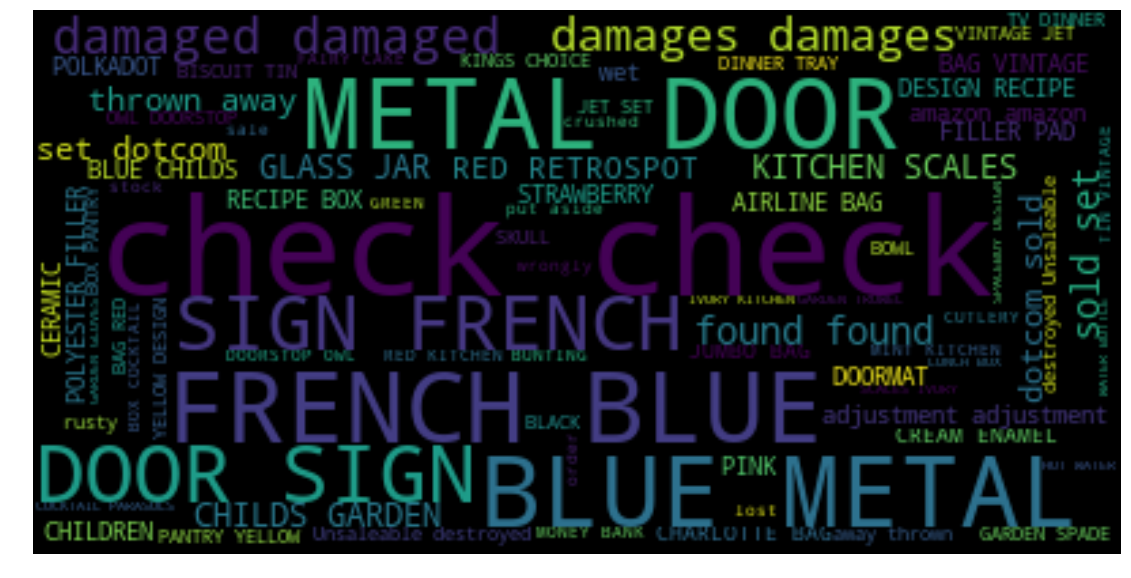

In [128]:
word_freq = {description:list(zero_unit_price.Description.values).count(description) for description in zero_unit_price.Description}
text = " ".join([(k + " ")*v for k,v in word_freq.items()])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We have a lot of strange words suggesting .... <h1 style='color:red'>Continue Here</h1>

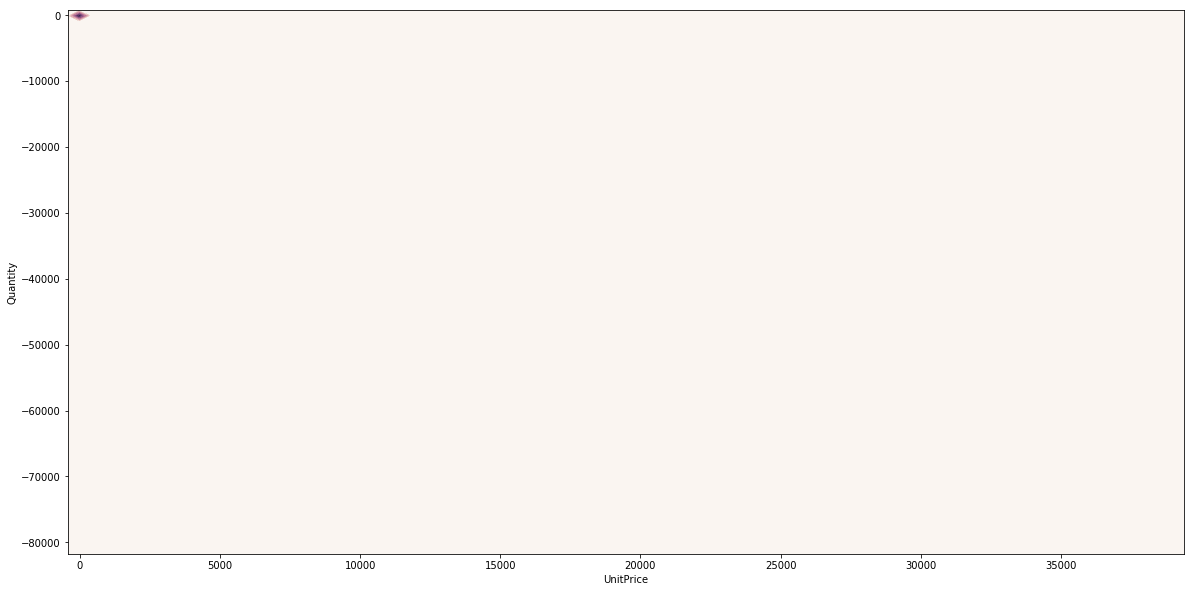

In [24]:
cmap = sn.cubehelix_palette(light=1, as_cmap=True)
sn.kdeplot(negative_quantity.UnitPrice, negative_quantity.Quantity, cmap=cmap, shade=True);

## Different descriptions for the same product

## Duplicated Values

In [4]:
print(f'Removed {len(get_duplicates(e_comerce_data))} duplicated entries')
e_comerce_data.drop_duplicates(inplace=True)

Removed 5268 duplicated entries


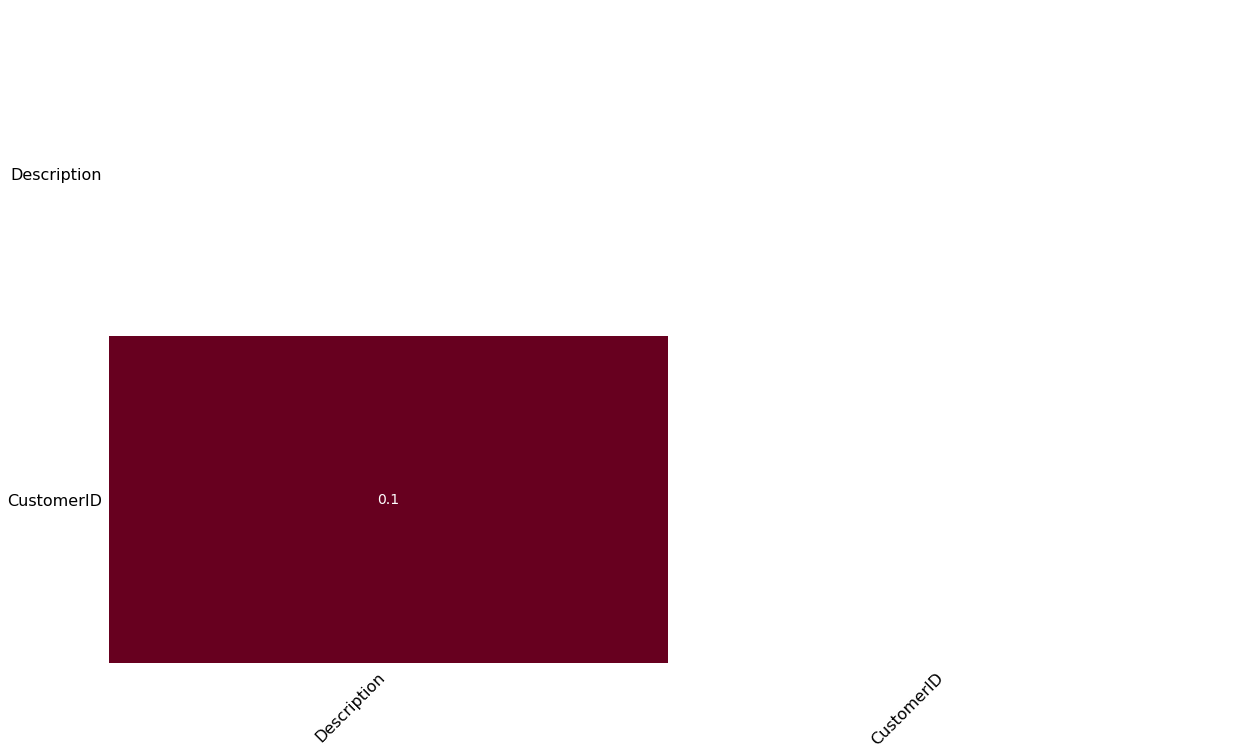

In [10]:
ms.heatmap(e_comerce_data)
plt.show()

### Missing data correlation

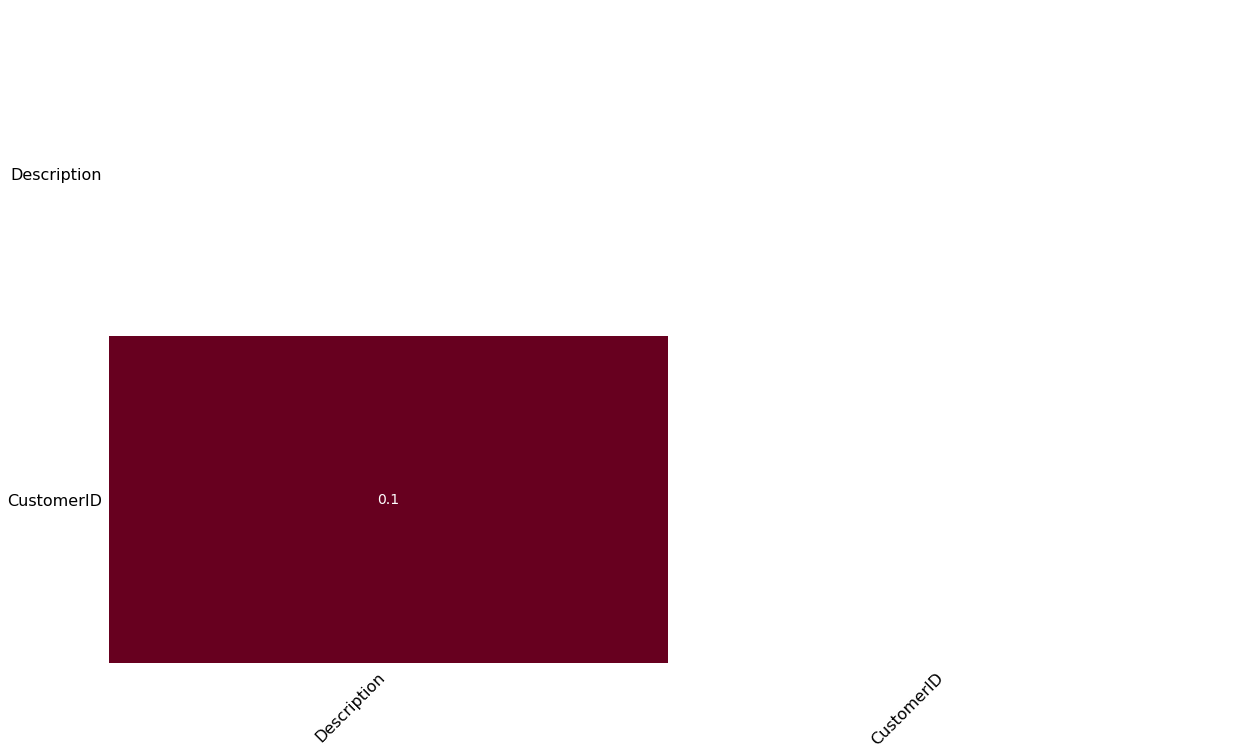

In [45]:
ms.heatmap(e_comerce_data)
plt.show()

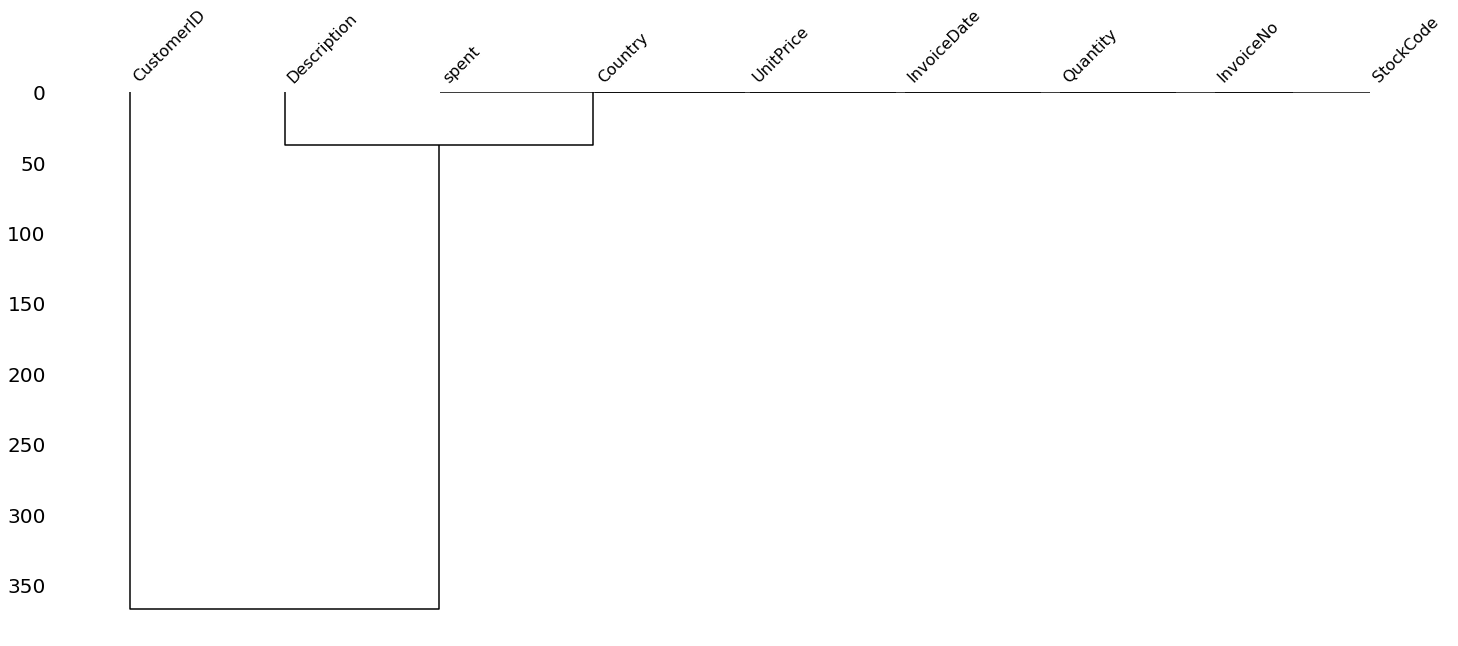

In [47]:
ms.dendrogram(e_comerce_data)
plt.show()

1. Is customer id relevant?
2. Can we find custmers ids?

## Correlation matrix

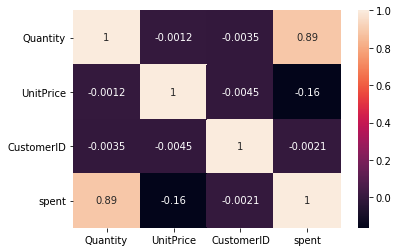

In [51]:
sn.heatmap(e_comerce_data.corr(), annot=True)
plt.show()

## Outliers

## Categorical values

# Data Structures

In [3]:
class Customer:
    def __init__(self, customer_id, country):
        self.customer_id = customer_id
        self.country = country
        self.transactions = []
    def addTransaction(transaction
                       
        self.transactions.append(transaction)
                       
    def __str__(self):
        return f'{self.customer_id} : {self.country}'
    

                       
class Product:
    def __init__(self, price, code, description):
        self.price = price
        self.code = code
        self.description = description
        
    def __str__(self):
        return f'{self.description} : {self.code} : {self.price}£'
    
    
                       
class Transaction:
    def __init__(self, product, quantity, date, canceled):
        self.product = product
        self.quantity = quantity
        self.date = date
        self.canceled = canceled
                       
    def __str__(self):
        return f'{self.product} x {self.quantity} : {self.date} \
        : Status: {"Canceled" if self.canceled else "Successful"}'
    

                       
class ECommerce:
    def __init__(self):
        self.customers = []
        self.products = []
        self.transactions = []
                       
    def addCustomer(self, customer):
        self.customers.append(customer)
                       
    def addProduct(self, product):
        self.products.append(product)
                       
    def addTransaction(self, transaction):
        self.transactions.append(transaction)
                       
    def customer_exist(self, customer_id):
        return any(customer.customer_id==customer_id for customer in e_commerce.customers)
                       
    def product_exist(self, code):
        return any(product.code==code for product in e_commerce.products)
                       
    def is_canceled(self, invoice_nr):
        return True if invoice_nr[0]=='c' else False
                       
    def getCustomer(self, customer_id):
        for customer in e_commerce.customers:
            if customer.customer_id==customer_id:
                return customer
        raise NameError
                       
    def getProduct(self, code):
        for product in e_commerce.products:
            if product.code==code:
                return product
        raise NameError
                       
    def __str__(self):
        return f'Customers: {len(self.customers)}\nProducts: {len(self.products)}\
        \nTransactions: {len(self.transactions)}'

# Data initialization

In [4]:
e_commerce = ECommerce()

def add_row_to_ecommerce(row):
    invoice_nr, code, description, quantity, date, price, customer_id, country = row.values
    if not e_commerce.customer_exist(customer_id):
        customer = Customer(customer_id, country)
        e_commerce.addCustomer(customer)
    else:
        customer =e_commerce.getCustomer(customer_id)
    if not e_commerce.product_exist(code):
        product = Product(price, code, description)
        e_commerce.addProduct(product)
    else:
        product = e_commerce.getProduct(code)
    is_canceled = e_commerce.is_canceled(invoice_nr)
    transaction = Transaction(product, quantity, date, is_canceled)
    e_commerce.addTransaction(transaction)

for row_idx in range(len(e_comerce_data)//100):
    add_row_to_ecommerce(e_comerce_data.iloc[row_idx])
    
print(e_commerce)

Customers: 21175
Products: 2908        
Transactions: 54190


# Dataset analysis

In [5]:
e_comerce_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      536641 non-null object
StockCode      536641 non-null object
Description    535187 non-null object
Quantity       536641 non-null int64
InvoiceDate    536641 non-null object
UnitPrice      536641 non-null float64
CustomerID     401604 non-null float64
Country        536641 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 36.8+ MB


In [6]:
e_comerce_data.describe()

Quantity      UnitPrice     CustomerID
count  536641.000000  536641.000000  401604.000000
mean        9.620029       4.632656   15281.160818
std       219.130156      97.233118    1714.006089
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13939.000000
50%         3.000000       2.080000   15145.000000
75%        10.000000       4.130000   16784.000000
max     80995.000000   38970.000000   18287.000000

In [12]:
print(f'''
Number of Products: {len(e_comerce_data.StockCode.unique())}
Number of Customers: {len(e_comerce_data.CustomerID.unique())}
Number of Transactions: {len(e_comerce_data.InvoiceNo.unique())}
''')


Number of Products: 4070
Number of Customers: 4373
Number of Transactions: 25900



In [7]:
e_comerce_data['spent'] = e_comerce_data.Quantity*e_comerce_data.UnitPrice
fig = px.choropleth(pd.DataFrame(np.array([e_comerce_data.groupby('Country')['spent'].mean().index,
                                 e_comerce_data.groupby('Country')['spent'].mean().values]).T,
                                 columns=['country', 'Average Spending']),
                    locations='country',
                    color='Average Spending',
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    title_text = 'Average Spending by purchase in E-Comerce in 2010-2011 (£)',
)

fig.show()

In [8]:
fig = px.choropleth(pd.DataFrame(np.array([e_comerce_data.groupby('Country')['InvoiceNo'].nunique().index,
                                 e_comerce_data.groupby('Country')['InvoiceNo'].nunique().values]).T,
                                 columns=['country', 'Nr Orders']),
                    locations='country',
                    color='Nr Orders',
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(
    title_text = 'Number of Orders in E-Comerce in 2010-2011',
)

fig.show()